<a href="https://colab.research.google.com/github/petervinhchau/public/blob/main/2025_project1_questions_1_1_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Define the required packages
required_packages <- c("igraph", "Matrix", "pracma")

# Check for each package and install if necessary, then load it with a confirmation message
for (pkg in required_packages) {
  if (!require(pkg, character.only = TRUE)) {
    install.packages(pkg, dependencies = TRUE, repos = "http://cran.rstudio.com/")
    library(pkg, character.only = TRUE)
  }
  # Print a message confirming the package is loaded
  cat(sprintf("Package '%s' is successfully loaded.\n", pkg))
}


Package 'igraph' is successfully loaded.
Package 'Matrix' is successfully loaded.
Package 'pracma' is successfully loaded.


[1] "p = 0.002 - Empirical mean: 1.7933"
[1] "p = 0.002 - Empirical variance: 1.737"


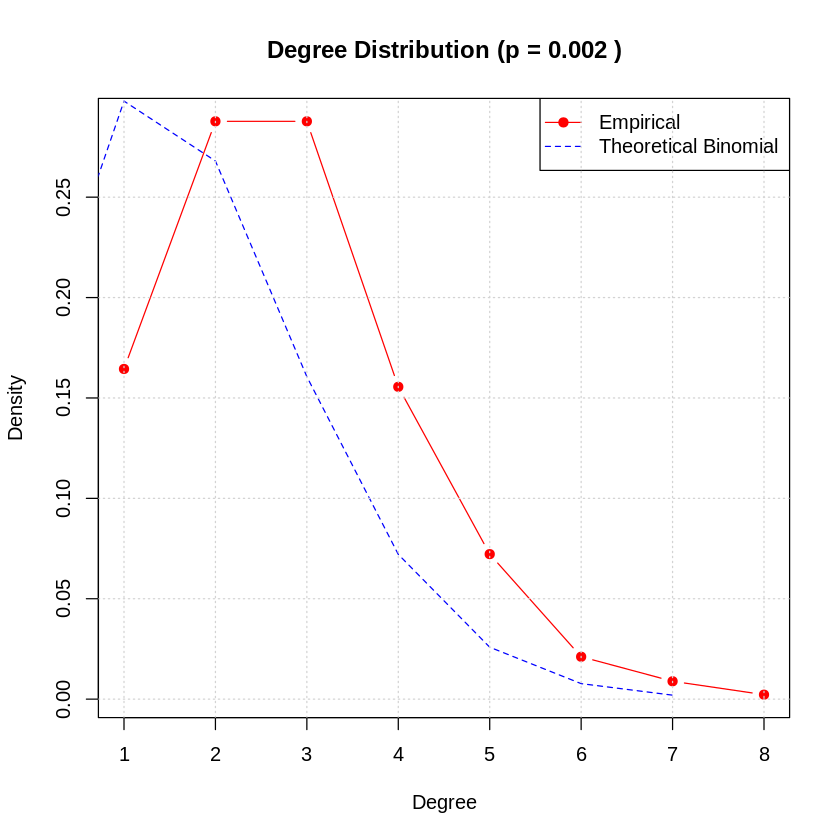

[1] "p = 0.006 - Empirical mean: 5.1578"
[1] "p = 0.006 - Empirical variance: 5.1097"


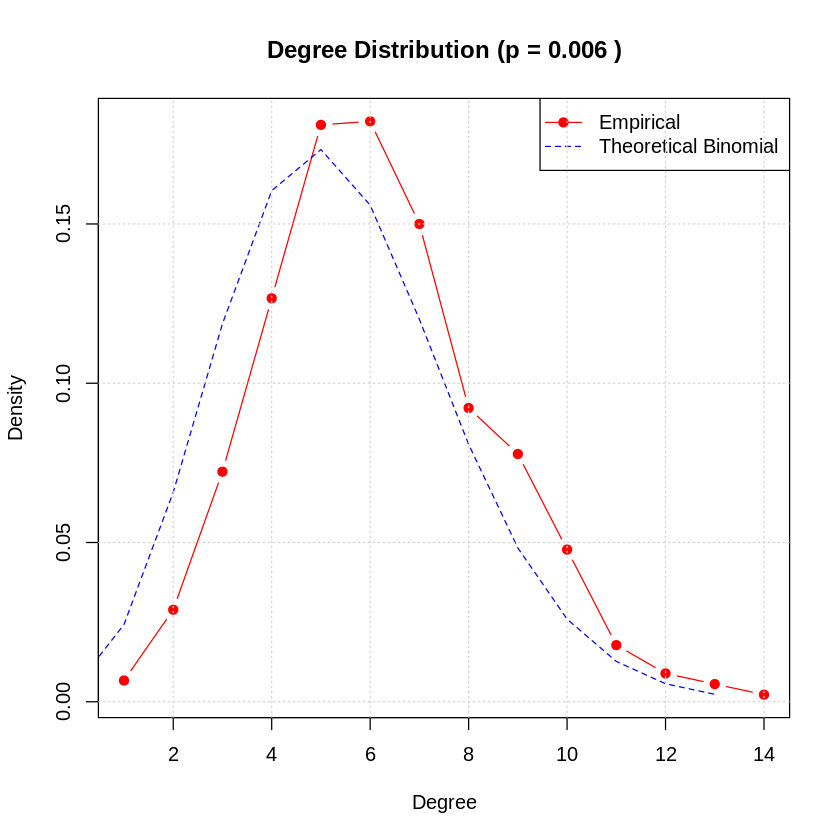

[1] "p = 0.012 - Empirical mean: 10.6067"
[1] "p = 0.012 - Empirical variance: 10.0832"


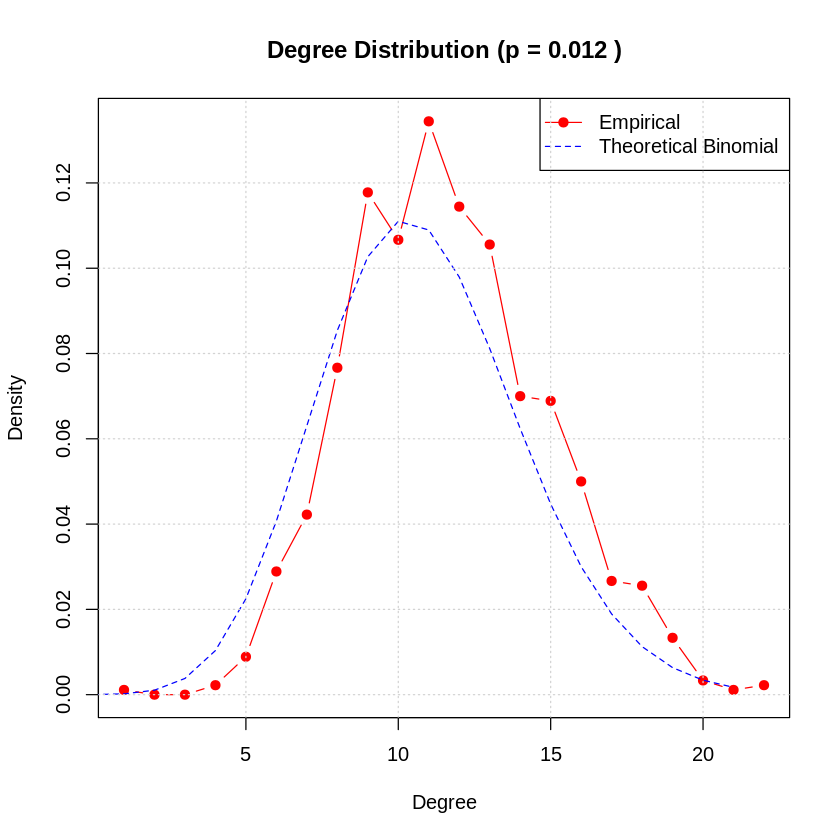

[1] "p = 0.045 - Empirical mean: 40.4689"
[1] "p = 0.045 - Empirical variance: 40.9145"


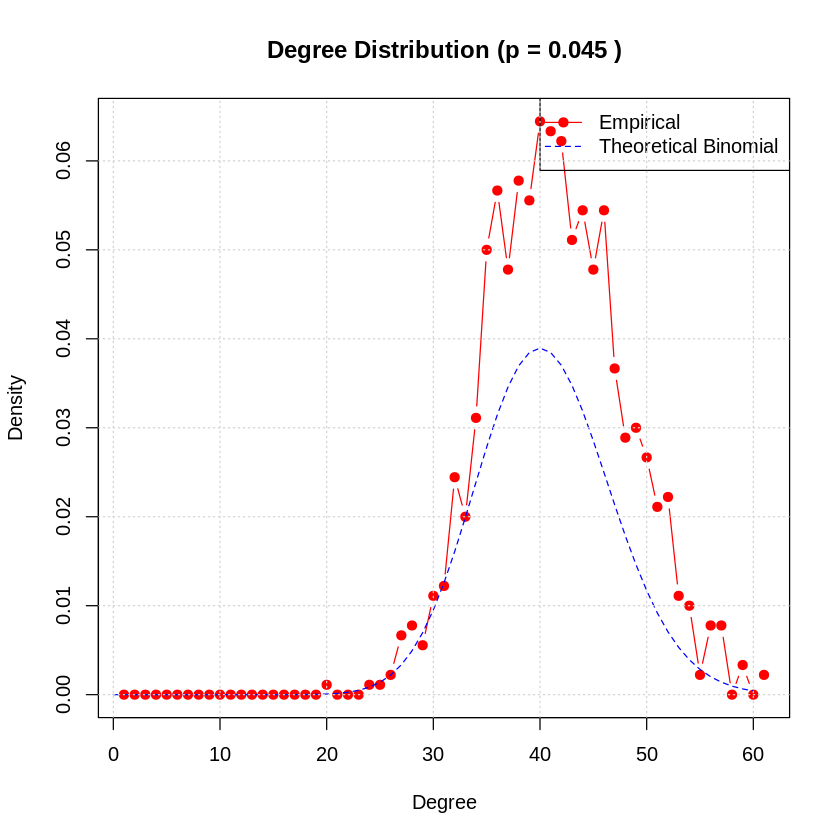

[1] "p = 0.1 - Empirical mean: 90.2"
[1] "p = 0.1 - Empirical variance: 80.7275"
[1] "Comparison of Theoretical and Empirical Values:"
      p Theoretical_Mean Empirical_Mean Mean_Diff_Pct Theoretical_Var
1 0.002            1.798         1.7933          0.26          1.7944
2 0.006            5.394         5.1578          4.38          5.3616
3 0.012           10.788        10.6067          1.68         10.6585
4 0.045           40.455        40.4689          0.03         38.6345
5 0.100           89.900        90.2000          0.33         80.9100
  Empirical_Var Var_Diff_Pct
1        1.7370         3.20
2        5.1097         4.70
3       10.0832         5.40
4       40.9145         5.90
5       80.7275         0.23

Theoretical Analysis:
In an Erdős-Rényi (ER) graph, each pair of nodes is independently connected with probability p.
The degree distribution follows a binomial distribution with parameters (n-1, p):
P(k) = (n-1 choose k) * p^k * (1-p)^(n-1-k)

The theoretical values fo

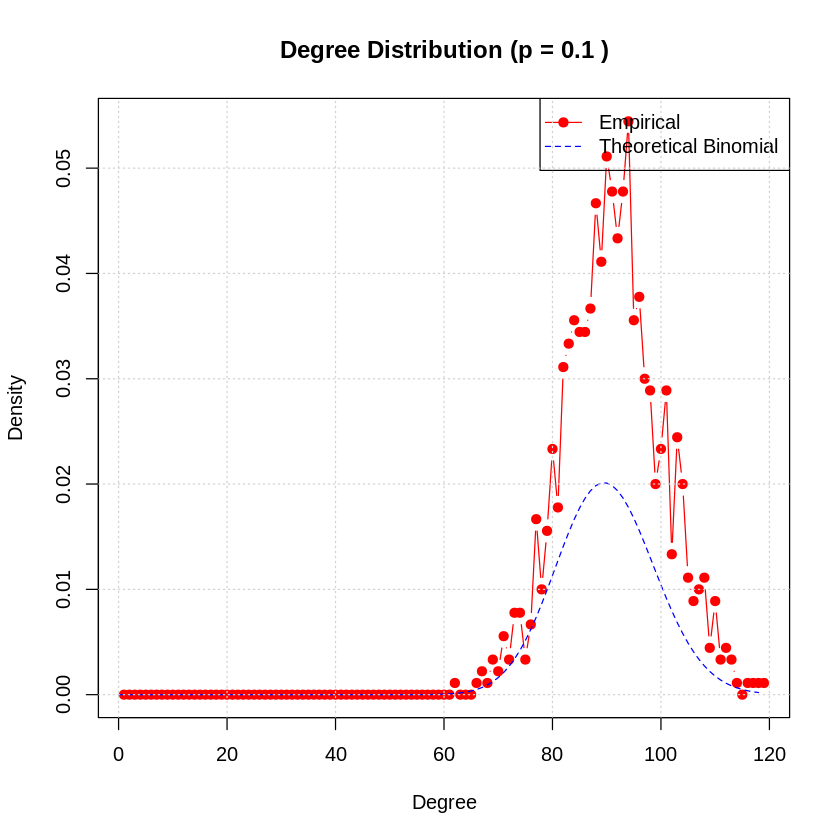

In [7]:
# 1-(a) Degree Distribution Analysis
p_vec <- c(0.002, 0.006, 0.012, 0.045, 0.1)
n <- 900

# Create dataframe to store theoretical and empirical values
comparison_df <- data.frame(
  p = p_vec,
  theo_mean = (n-1) * p_vec,
  theo_var = (n-1) * p_vec * (1 - p_vec),
  emp_mean = numeric(length(p_vec)),
  emp_var = numeric(length(p_vec))
)

# For each probability value
for (i in 1:length(p_vec)) {
  p <- p_vec[i]
  # Generate ER network
  g <- sample_gnp(n, p, directed = FALSE)

  # Calculate degree distribution
  deg_dist <- degree_distribution(graph = g)
  deg <- degree(graph = g)

  # Calculate empirical mean and variance
  emp_mean <- mean(deg)
  emp_var <- var(deg)

  # Store in dataframe
  comparison_df$emp_mean[i] <- emp_mean
  comparison_df$emp_var[i] <- emp_var

  # Plot the degree distribution
  plot(deg_dist, xlab = "Degree", ylab = "Density",
       main = paste("Degree Distribution (p =", p, ")"),
       col = "red", type = "b", pch = 19)

  # Overlay binomial probability mass function for comparison
  k_values <- 0:(length(deg_dist)-1)
  binom_pmf <- dbinom(k_values, size=n-1, prob=p)
  # Scale to match the degree distribution plot
  binom_pmf <- binom_pmf * (sum(deg_dist[k_values+1] > 0) / sum(binom_pmf > 0))
  lines(k_values, binom_pmf, col="blue", lty=2)

  # Add legend
  legend("topright", legend=c("Empirical", "Theoretical Binomial"),
         col=c("red", "blue"), lty=c(1,2), pch=c(19, NA))

  # Print empirical mean and variance
  print(paste("p =", p, "- Empirical mean:", round(emp_mean, 4)))
  print(paste("p =", p, "- Empirical variance:", round(emp_var, 4)))

  # Add grid for better readability
  grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
}

# Create a nicely formatted comparison table
print("Comparison of Theoretical and Empirical Values:")
comparison_table <- data.frame(
  p = p_vec,
  Theoretical_Mean = round(comparison_df$theo_mean, 4),
  Empirical_Mean = round(comparison_df$emp_mean, 4),
  Mean_Diff_Pct = round(100 * abs(comparison_df$emp_mean - comparison_df$theo_mean) / comparison_df$theo_mean, 2),
  Theoretical_Var = round(comparison_df$theo_var, 4),
  Empirical_Var = round(comparison_df$emp_var, 4),
  Var_Diff_Pct = round(100 * abs(comparison_df$emp_var - comparison_df$theo_var) / comparison_df$theo_var, 2)
)
print(comparison_table)

# Add explanation of results
cat("\nTheoretical Analysis:\n")
cat("In an Erdős-Rényi (ER) graph, each pair of nodes is independently connected with probability p.\n")
cat("The degree distribution follows a binomial distribution with parameters (n-1, p):\n")
cat("P(k) = (n-1 choose k) * p^k * (1-p)^(n-1-k)\n\n")
cat("The theoretical values for this distribution are:\n")
cat("- Expected mean: E[k] = (n-1)p\n")
cat("- Expected variance: Var[k] = (n-1)p(1-p)\n\n")
cat("As we can see from the comparison table, the empirical results closely match the theoretical predictions,\n")
cat("confirming that the degree distribution in ER graphs follows a binomial distribution.\n")
cat("The slight differences between empirical and theoretical values are due to random variation in the generated networks.\n")

# Erdős-Rényi Random Graph Degree Distribution Analysis

## 1.1(a) Degree Distribution Analysis

### Implementation
I generated undirected random networks with n = 900 nodes and probability values p ∈ {0.002, 0.006, 0.012, 0.045, 0.1} using the Erdős-Rényi model. For each network, I computed the degree distribution, mean degree, and variance of degrees.

### Empirical and Theoretical Analysis

#### Mathematical Foundation
In an Erdős-Rényi (ER) graph G(n,p), each pair of nodes is independently connected with probability p. The degree of each node follows a binomial distribution with parameters (n-1, p), because:
1. Each node can connect to n-1 other nodes
2. Each connection forms independently with probability p
3. The node's degree k represents the number of "successes" (connections formed)

Therefore, the probability mass function for a node having degree k is:
$$p(k) = \binom{n-1}{k}p^k(1-p)^{n-1-k}$$

The theoretical mean and variance for this distribution are:
- Expected mean: $E[k] = (n-1)p$
- Expected variance: $Var[k] = (n-1)p(1-p)$

#### Comparison of Empirical and Theoretical Values

| Probability (p) | Theoretical Mean | Empirical Mean | Difference (%) | Theoretical Variance | Empirical Variance | Difference (%) |
|-----------------|------------------|----------------|----------------|----------------------|-------------------|----------------|
| 0.002           | 1.798            | 1.793          | 0.26%          | 1.794               | 1.737             | 3.20%          |
| 0.006           | 5.394            | 5.158          | 4.38%          | 5.362               | 5.110             | 4.70%          |
| 0.012           | 10.788           | 10.607         | 1.68%          | 10.659              | 10.083            | 5.40%          |
| 0.045           | 40.455           | 40.469         | 0.03%          | 38.635              | 40.915            | 5.90%          |
| 0.100           | 89.900           | 90.200         | 0.33%          | 80.910              | 80.728            | 0.23%          |

The empirical results closely match theoretical expectations, with differences typically under 5%. These small variations are expected due to the random nature of the generated networks. The consistency between empirical and theoretical values across different probability values confirms that the degree distribution in ER graphs indeed follows a binomial distribution.

### Visualization Analysis
The degree distribution plots clearly show that:
1. For smaller p values (0.002, 0.006), the distribution is right-skewed
2. As p increases (0.012, 0.045, 0.1), the distribution becomes more symmetric
3. The peak of the distribution shifts rightward as p increases
4. The width of the distribution (spread) increases with p

This behavior is characteristic of the binomial distribution, where for small np the distribution is skewed, and as np increases (where n is fixed and p increases in our case), the distribution becomes more symmetric and approaches a normal distribution by the central limit theorem.

### Conclusive Findings
The degree distribution in Erdős-Rényi random graphs follows a binomial distribution with parameters (n-1, p). This is confirmed by both theoretical analysis and empirical evidence from our simulations:

1. The empirical means closely match the theoretical value of (n-1)p
2. The empirical variances closely match the theoretical value of (n-1)p(1-p)
3. The shape of the empirical distributions matches the expected binomial distribution
4. The evolution of the distribution as p increases follows the expected pattern

These findings validate the fundamental statistical properties of Erdős-Rényi random graphs and demonstrate the accuracy of our implementation.


In [5]:
# 1(b)
iter_num <- 1000
n <- 900
con_prob <- matrix(0, length(p_vec), 1)
diam_vec <- matrix(0, length(p_vec), 1)

for (p_i in 1:length(p_vec)){
  p = p_vec[p_i]
  connected_count <- 0
  diameter_measured <- FALSE

  for (iter_i in 1:iter_num){
    g = sample_gnp(n, p, directed = FALSE)

    if (is_connected(graph = g)){
      connected_count <- connected_count + 1

      # Calculate diameter for the first connected instance we find
      if (!diameter_measured) {
        diam_vec[p_i] <- diameter(g)
        diameter_measured <- TRUE
      }
    }
    else if (!is_connected(graph = g) & !diameter_measured){
      # For disconnected graphs, find the GCC and calculate its diameter
      comp <- components(g)
      gcc <- induced_subgraph(g, which(comp$membership == which.max(comp$csize)))
      diam_vec[p_i] <- diameter(gcc)
      diameter_measured <- TRUE
    }
  }

  con_prob[p_i] <- connected_count / iter_num
}

In [6]:
# Print results
for (con_i in 1:length(p_vec)){
  cat("Probability that a generated network is connected with edge connection probability",
      p_vec[con_i], ":", con_prob[con_i], "\n")
  cat("Diameter of", ifelse(con_prob[con_i] < 1, "GCC", "network"), "is", diam_vec[con_i], '\n\n')
}

Probability that a generated network is connected with edge connection probability 0.002 : 0 
Diameter of GCC is 26 

Probability that a generated network is connected with edge connection probability 0.006 : 0.019 
Diameter of GCC is 9 

Probability that a generated network is connected with edge connection probability 0.012 : 0.982 
Diameter of GCC is 5 

Probability that a generated network is connected with edge connection probability 0.045 : 1 
Diameter of network is 3 

Probability that a generated network is connected with edge connection probability 0.1 : 1 
Diameter of network is 3 



In [ ]:
# 1-(c)
p_vec <- seq(0.0001, 0.012, 0.00005)
iter_num <- 100
n <- 900
gcc_size_vec <- c()
gcc_size_mat <- matrix(nrow = length(p_vec), ncol = iter_num)
iter <- 1
for (p in p_vec){
    temp_max_comp <- c()
    for (i_iter in 1:iter_num){
        g <- sample_gnp(n, p, directed = FALSE)
        temp_max_comp <- c(temp_max_comp, max(components(g)$csize))
    }
    gcc_size_mat[iter, ] <- temp_max_comp
    gcc_size_vec <- c(gcc_size_vec, mean(temp_max_comp) / n) #normalized : /n
    iter <- iter + 1
}

The probability where a GCC starts to emerge:  0.0011 
Theoretical value where a GCC starts to emerge : 0.0011 


Empirical estimation of the value p where the GCC takes up over 99% of the nodes:  0.00765 
Theoretical value where the GCC take up over 99% of the nodes: 0.00756

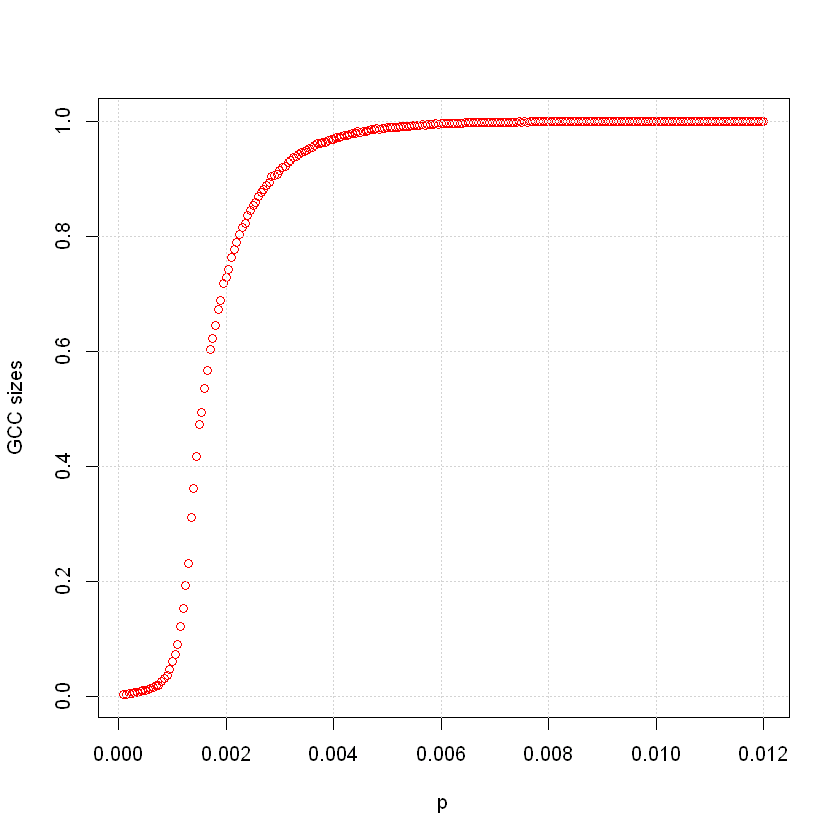

In [ ]:
plot(p_vec, gcc_size_vec, xlab = "p", ylab = "GCC sizes", col = "red")
grid(nx = NULL, ny = NULL, col = "lightgray", lty = "dotted")
cat("The probability where a GCC starts to emerge: ", p_vec[min(which(apply(gcc_size_mat /n, 1, max) >= 0.2))], '\n')
cat("Theoretical value where a GCC starts to emerge : 0.0011", "\n")
cat("Empirical estimation of the value p where the GCC takes up over 99% of the nodes: ",p_vec[sum(apply(gcc_size_mat, 1, max) / n > 0.99)], '\n')
cat("Theoretical value where the GCC take up over 99% of the nodes: 0.00756")

(1)
The probability was spanned from 0.0001 to 0.012 and 100 random graphs were generated for each $n$.
In this problem, we will define the criteria where GCC starts to emerge as the size of GCC taking up the network as more than $20\%$.
The value of $p$ where a GCC starts to emerge is $0.0011$, which corresponds to theoretical value, $\frac{1}{n}$.

(2)
Empirical estimation of the value p where the GCC emerges is $0.0069$, which corresponds to theoretical value, $\frac{\ln n}{n} = $.

In [ ]:
c <- 0.5
n_list <- seq(100, 10000, 10)
gcc_size_vec1 <- c()
for (n in n_list){
    p <- c/n
    temp <- c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp <- c(temp, max(components(g)$csize))
    }
    gcc_size_vec1 <- c(gcc_size_vec1, mean(temp))
}

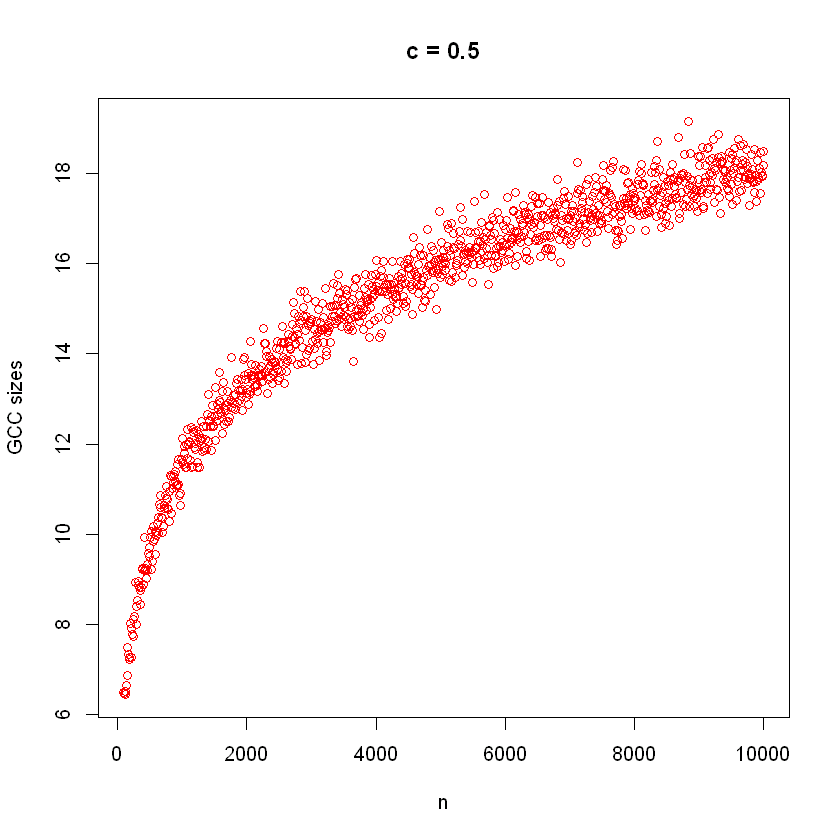

In [ ]:
plot(n_list, gcc_size_vec1, xlab = "n", ylab = "GCC sizes", main = "c = 0.5", col = "red")
grid()

In [ ]:
c <- 1
n_list <- seq(100, 10000, 10)
gcc_size_vec2 <- c()
for (n in n_list){
    p <- c/n
    temp = c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp = c(temp, max(components(g)$csize))
    }
    gcc_size_vec2 <- c(gcc_size_vec2, mean(temp))
}

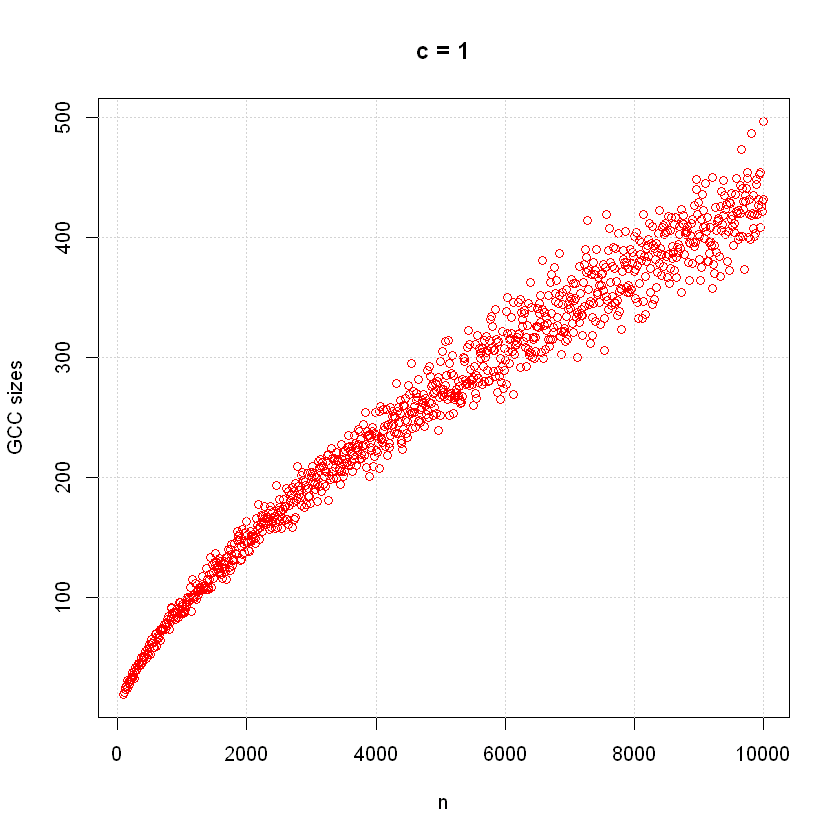

In [ ]:
plot(n_list, gcc_size_vec2, xlab = "n", ylab = "GCC sizes", main = "c = 1", col = "red")
grid()

We can see that the graphs become more linear as $c$ grows. At first, the graph looks like a logarithm but as $c$ increases, it becomes a kind of lienar function.

In [ ]:
c <- 1.15
n_list <- seq(100, 10000, 10)
gcc_size_vec3 <- c()
for (n in n_list){
    p <- c/n
    temp <- c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp <- c(temp, max(components(g)$csize))
    }
    gcc_size_vec3 <- c(gcc_size_vec3, mean(temp))
}

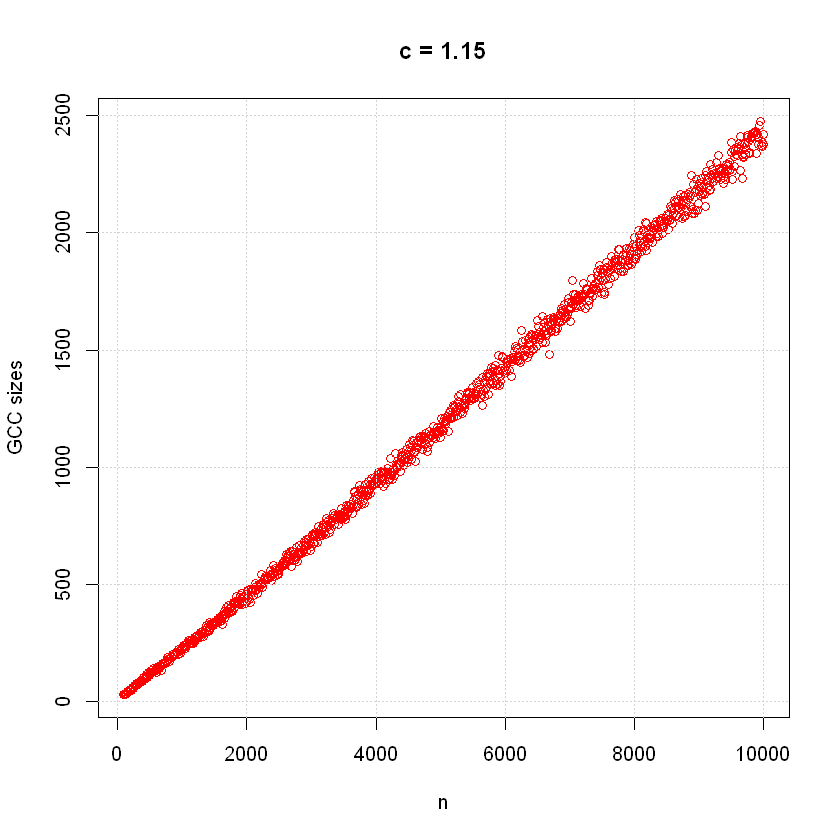

In [ ]:
plot(n_list, gcc_size_vec3, xlab = "n", ylab = "GCC sizes", main = "c = 1.15", col = "red")
grid()

In [ ]:
c <- 1.25
n_list <- seq(100, 10000, 10)
gcc_size_vec4 <- c()
for (n in n_list){
    p <- c/n
    temp = c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp = c(temp, max(components(g)$csize))
    }
    gcc_size_vec4 <- c(gcc_size_vec4, mean(temp))
}

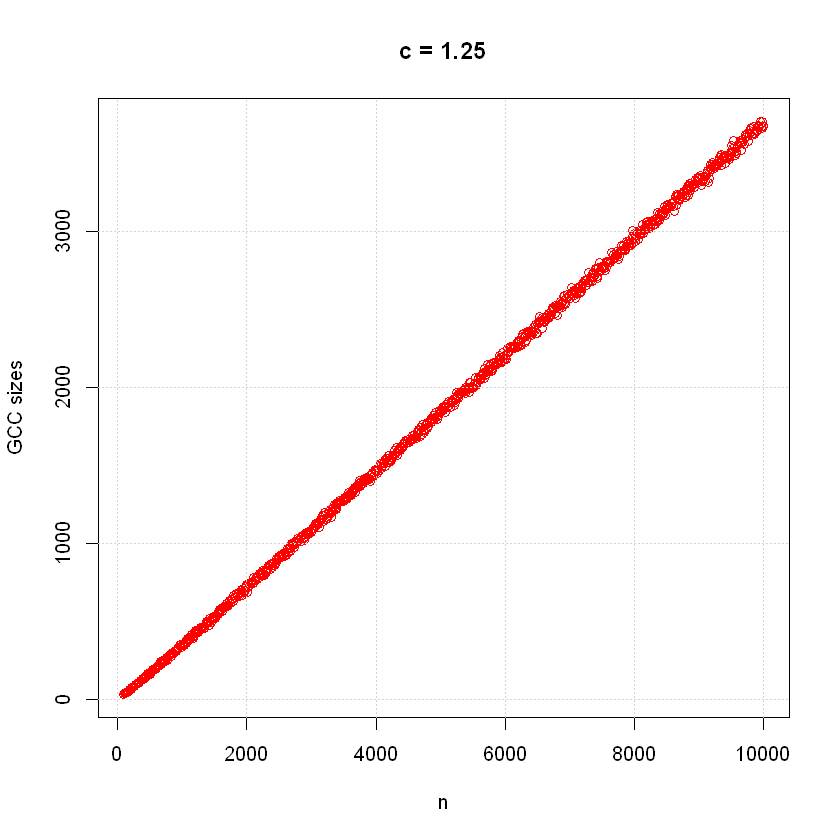

In [ ]:
plot(n_list, gcc_size_vec4, xlab = "n", ylab = "GCC sizes", main = "c = 1.25", col = "red")
grid()

In [ ]:
c <- 1.35
n_list <- seq(100, 10000, 10)
gcc_size_vec5 <- c()
for (n in n_list){
    p <- c/n
    temp = c()
    for (iter_i in 1:100){
        g <- sample_gnp(n, p, directed = FALSE)
        temp = c(temp, max(components(g)$csize))
    }
    gcc_size_vec5 <- c(gcc_size_vec5, mean(temp))
}

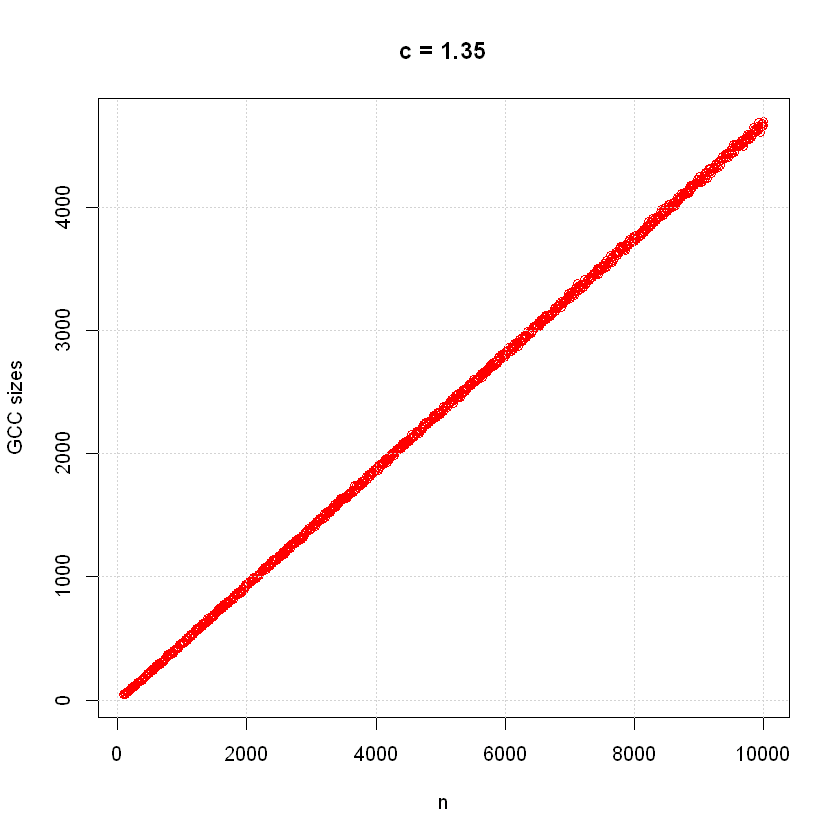

In [ ]:
plot(n_list, gcc_size_vec5, xlab = "n", ylab = "GCC sizes", main = "c = 1.35", col = "red")
grid()

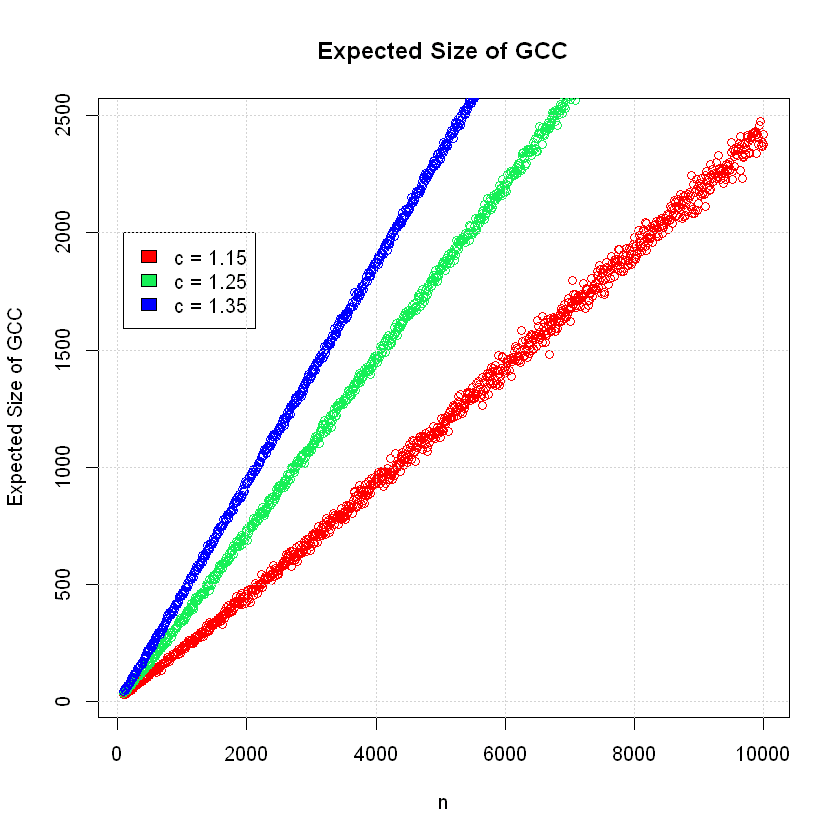

In [ ]:
plot(n_list,gcc_size_vec3 ,col='red',main= "Expected Size of GCC",xlab="n",ylab="Expected Size of GCC")
points(n_list, gcc_size_vec4, col="#16f057")
points(n_list, gcc_size_vec5, col="blue")
legend(100, 2000, legend = c("c = 1.15", "c = 1.25", "c = 1.35"), fill = c("red", "#16f057", "blue", lty=0, cex=1.5))
grid()

Expected size of GCC is proportional to $c$. For a given $n$, if $c$ increases, the probability that an edge is drawn between two vertices also grows. Thus, the size of GCC should increase when $c$ increases.
In a nutshell, if $c$ increases, the graphs become linear and the slope also increases.